In [1]:
import os
import sys
import math
import time
import numpy as np
import pyfftw as ft 
import matplotlib
import matplotlib.pyplot as plt
import pyJHTDB
from pyJHTDB.dbinfo import isotropic1024coarse
from pyJHTDB import libJHTDB

In [2]:
Nx = isotropic1024coarse['nx']; Ny = isotropic1024coarse['ny']; Nz = isotropic1024coarse['nz']
Lx = isotropic1024coarse['lx']; Ly = isotropic1024coarse['ly']; Lz = isotropic1024coarse['lz']

nproc = 8
nx=Nx//nproc; ny=Ny; nz=Nz
reftime = 0.0

chkSz = 32
slabs = nx//chkSz

In [3]:
start = time.time()

folder = "/home/idies/workspace/scratch"

u = np.zeros((Nx,Ny,Nz), dtype='float32')
v = np.zeros((Nx,Ny,Nz), dtype='float32')
w = np.zeros((Nx,Ny,Nz), dtype='float32')

for k in range(nproc):
    filename = "ref-isotropic1024coarse-"+str(k)+"-(t="+str(reftime)+")"+".npz"
    files = folder + "/" + filename
    
    vx = np.zeros((nx,ny,nz), dtype='float32')
    vy = np.zeros((nx,ny,nz), dtype='float32')
    vz = np.zeros((nx,ny,nz), dtype='float32')
    
    content = np.load(files)
    
    vx[:,:,:] = content['vx']
    vy[:,:,:] = content['vy']
    vz[:,:,:] = content['vz']
    
    u[k*nx:(k+1)*nx,:,:] = vx[:,:,:]
    v[k*nx:(k+1)*nx,:,:] = vy[:,:,:]
    w[k*nx:(k+1)*nx,:,:] = vz[:,:,:]        
    
end = time.time()
print(end-start)

221.913626194


In [4]:
N = Nx

In [5]:
X = np.zeros((N,N,N))
Y = np.zeros((N,N,N))
Z = np.zeros((N,N,N))

In [6]:
start = time.time()

for i in range(N):
    X[i,:,:] = i*isotropic1024coarse['dx']
    
for j in range(N):
    Y[:,j,:] = j*isotropic1024coarse['dy']
    
for k in range(N):
    Z[:,:,k] = k*isotropic1024coarse['dz']

end = time.time()
print(end-start)

325.339508057


In [7]:
start = time.time()

wiz = (b'(fftw-3.3.4 fftw_wisdom #x41ad5c95 #x159437f1 #x23fdee71 #xc6cf4464\n)\n', b'(fftw-3.3.4 fftwf_wisdom #xa84d9475 #xdb220970 #x4aa6f1c4 #xf3163254\n  (fftwf_rdft2_thr_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x0478d9e6 #xffc458b2 #xefeba0c5 #xe8fb2e05)\n  (fftwf_dft_buffered_register 1 #x11bdd #x11bdd #x0 #xb6380734 #x8d827d8e #xdc067a28 #x4fc763de)\n  (fftwf_rdft_rank0_register 4 #x10bdd #x10bdd #x0 #xf3c0402e #xf303d9aa #xbdc22798 #xd9510af9)\n  (fftwf_rdft2_rank_geq2_register 0 #x11bdd #x11bdd #x0 #xe0177557 #xe9f32997 #xfb2dcb2c #xf8f70860)\n  (fftwf_dft_buffered_register 0 #x10bdd #x10bdd #x0 #x3eeb1978 #x428183dc #x2a84fbfa #xe4361ea0)\n  (fftwf_codelet_hc2cb_8 0 #x10bdd #x10bdd #x0 #x48259488 #x196c8c29 #x37f91b06 #x556264da)\n  (fftwf_rdft2_rank_geq2_register 0 #x10bdd #x10bdd #x0 #xb27d35ea #xa96ba975 #x4796bd74 #xae50e653)\n  (fftwf_dft_vrank_geq1_register 0 #x10fdd #x10fdd #x0 #x68ff47a8 #x21bb9e5b #xa20dc9bd #xd2485c0c)\n  (fftwf_codelet_r2cb_8 2 #x10bdd #x10bdd #x0 #x669a3813 #x9ba2bb21 #x64e8656d #x87c9de00)\n  (fftwf_dft_indirect_register 0 #x10bdd #x10bdd #x0 #x9c0e3f58 #x928ea026 #xd28229a3 #x7246e0ac)\n  (fftwf_codelet_q1_4 0 #x10fdd #x10fdd #x0 #xee87b2d5 #x3e497607 #xfff1907f #xf9579a39)\n  (fftwf_dft_vrank_geq1_register 0 #x10fdd #x10fdd #x0 #x8676a7b7 #xe006c70d #x487b0278 #xb2f8f002)\n  (fftwf_rdft2_rank_geq2_register 0 #x10bdd #x10bdd #x0 #xb8bedcad #x45a4525b #xc44e4385 #xa637a3a4)\n  (fftwf_codelet_r2cf_8 2 #x11bdd #x11bdd #x0 #x675249aa #x037557b8 #x14643a4b #x9ea626ef)\n  (fftwf_dft_r2hc_register 0 #x10bdd #x10bdd #x0 #x33c540f7 #x7207139c #x75ca3a4c #x748bc1b6)\n  (fftwf_dft_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #xf6843763 #xe67a42c5 #x37896514 #x1934a686)\n  (fftwf_rdft_rank0_register 3 #x10bdd #x10bdd #x0 #x91607aa1 #xd40dae11 #x01dbbb42 #x733d3911)\n  (fftwf_codelet_t1_4 0 #x10fdd #x10fdd #x0 #x1e5fa302 #x4dca4b4b #x68854fe7 #x57f745da)\n  (fftwf_dft_r2hc_register 0 #x11bdd #x11bdd #x0 #x129e3b9a #xbe5c8c09 #x84314e36 #x92c09d6d)\n  (fftwf_rdft2_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x1a3fc773 #x16826a6d #x4ac1ba9b #x71705541)\n  (fftwf_codelet_r2cfII_8 2 #x11bdd #x11bdd #x0 #xc7a8d0be #x7798b669 #x9437b479 #x2ba791fc)\n  (fftwf_dft_nop_register 0 #x11bdd #x11bdd #x0 #x2ca97a7c #x1278c07a #x4b274fea #x63afcfcd)\n  (fftwf_rdft_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x2b2a182d #x1a4f0eb8 #x4051bfc8 #x50ede16d)\n  (fftwf_dft_vrank_geq1_register 0 #x10fdd #x10fdd #x0 #x09558463 #xdea41841 #xf014e84a #x343a12e5)\n  (fftwf_dft_buffered_register 0 #x11bdd #x11bdd #x0 #xf6040783 #x4ecac406 #x61d1e470 #xc372144f)\n  (fftwf_dft_r2hc_register 0 #x10bdd #x10bdd #x0 #x37c7ab24 #x6b6a7433 #xbb43af76 #x9bd7720f)\n  (fftwf_codelet_t1_16 0 #x10bdd #x10bdd #x0 #xcd08c9cd #xac2dabe6 #x0a6d47c5 #x5b07814f)\n  (fftwf_dft_nop_register 0 #x10bdd #x10bdd #x0 #xd84e4956 #xbbda597c #x4dcc8ca2 #x8135f48a)\n  (fftwf_dft_nop_register 0 #x11bdd #x11bdd #x0 #xb5f6482a #x970cff75 #xad1e3938 #x526a74d7)\n  (fftwf_dft_r2hc_register 0 #x10bdd #x10bdd #x0 #x54bf9035 #xa469d859 #x8c3af79c #xaabf7edf)\n  (fftwf_codelet_t1_16 0 #x10bdd #x10bdd #x0 #xbf8f2281 #x53d808d5 #x34ab52eb #x747f8bf4)\n  (fftwf_dft_nop_register 0 #x10bdd #x10bdd #x0 #x4c6eda6a #xd64bb98a #xdeff4d47 #xbd9bc277)\n  (fftwf_rdft_rank0_register 2 #x11bdd #x11bdd #x0 #x104e8159 #x92ac0177 #x0f50339e #x2c4a57af)\n  (fftwf_codelet_t1_4 0 #x10fdd #x10fdd #x0 #x914f085b #x7945eab1 #xb24b3509 #x41ff886a)\n  (fftwf_dft_buffered_register 1 #x10bdd #x10bdd #x0 #x7cf6cc98 #x1860681d #x04f92f92 #x64e3787b)\n  (fftwf_codelet_n1_64 0 #x10fdd #x10fdd #x0 #x2d58151a #x7bf279ac #xd05075c9 #x05025c02)\n  (fftwf_codelet_hc2cf_8 0 #x11bdd #x11bdd #x0 #xa3aa3245 #xfa89ad84 #x6f51d136 #x21269ea8)\n  (fftwf_codelet_q1_4 0 #x10fdd #x10fdd #x0 #x6e3f6b00 #xc631065b #xc5ce0991 #xc9e5830a)\n  (fftwf_rdft2_thr_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #x245908be #x1b45c309 #xfa989829 #xe3448ecb)\n  (fftwf_dft_thr_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #xce1da3b2 #xb156b9ff #x345deb46 #x24967a68)\n  (fftwf_codelet_n1_64 0 #x10bdd #x10bdd #x0 #xbf36f96d #xc5099024 #xab4588dd #x0f71c101)\n  (fftwf_dft_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #xca4b9bb9 #x447b7ee5 #xbb98516b #x49ee082c)\n  (fftwf_rdft_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #x2fdf6c57 #xa3a423cb #x3c83b16e #xd62995da)\n  (fftwf_dft_indirect_register 0 #x10bdd #x10bdd #x0 #x938d7e18 #x1343c0de #xbe03a120 #x64e734a9)\n  (fftwf_codelet_n1_64 0 #x10fdd #x10fdd #x0 #xee00c037 #x8d699089 #xad7ad6a0 #x4efaaf7d)\n  (fftwf_dft_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #x1fe15182 #x5f3d421c #xba834eb6 #x2292df94)\n  (fftwf_rdft2_rank_geq2_register 0 #x11bdd #x11bdd #x0 #xbd6b8262 #xabd0b6b7 #xe6ad6d03 #x628df7dc)\n  (fftwf_rdft_rank0_register 2 #x10bdd #x10bdd #x0 #x104e8159 #x92ac0177 #x0f50339e #x2c4a57af)\n  (fftwf_rdft2_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #x32025de0 #x37ce7b0a #x95c084dd #xcd18ab21)\n  (fftwf_codelet_r2cb_128 0 #x10bdd #x10bdd #x0 #x673294cd #xe5b085a3 #xb8a774bf #xfd19dfb2)\n  (fftwf_dft_r2hc_register 0 #x10bdd #x10bdd #x0 #x3c666628 #x01043fe7 #x20ba9e85 #x1f9b67a1)\n  (fftwf_codelet_r2cbIII_8 2 #x10bdd #x10bdd #x0 #xfb67696a #x19d836b7 #x6b24c329 #xe4fc2e8b)\n  (fftwf_rdft_rank0_register 3 #x11bdd #x11bdd #x0 #x91607aa1 #xd40dae11 #x01dbbb42 #x733d3911)\n  (fftwf_dft_r2hc_register 0 #x11bdd #x11bdd #x0 #x38a08196 #x2a4ca72e #x2d1ba440 #x10600d8c)\n  (fftwf_codelet_n1_64 0 #x10bdd #x10bdd #x0 #x1913d4ac #xf2d50866 #xc504d3dd #x76d5edcd)\n  (fftwf_dft_vrank_geq1_register 0 #x10fdd #x10fdd #x0 #x411f7a68 #x161cf1d6 #xbec2d98e #x7d9fdffa)\n  (fftwf_dft_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x89cb22ca #x6491b1a8 #xf5f7b0be #x3cd19d43)\n  (fftwf_dft_thr_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x519e2811 #xfd996521 #x222afcf1 #xa289f0a6)\n  (fftwf_codelet_r2cf_128 0 #x11bdd #x11bdd #x0 #x23eb177d #x111d2c06 #xa78f35fb #xd56dcd76)\n)\n', b'(fftw-3.3.4 fftwl_wisdom #x0821b5c7 #xa4c07d5a #x21b58211 #xebe513ab\n)\n')
wiz_aws = ('(fftw-3.3.5 fftw_wisdom #x3c273403 #x192df114 #x4d08727c #xe98e9b9d\n)\n','(fftw-3.3.5 fftwf_wisdom #x706526c0 #x2f8b6c85 #x8cd1bb1a #x7c96e03d\n  (fftwf_codelet_n1fv_32_avx 0 #x10fdd #x10fdd #x0 #xd3a62617 #x8a0451dd #x42952706 #x6501219f)\n  (fftwf_rdft2_rank_geq2_register 0 #x10bdd #x10bdd #x0 #xb8bedcad #x45a4525b #xc44e4385 #xa637a3a4)\n  (fftwf_rdft_rank0_register 4 #x10bdd #x10bdd #x0 #xf3c0402e #xf303d9aa #xbdc22798 #xd9510af9)\n  (fftwf_rdft2_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x1a3fc773 #x16826a6d #x4ac1ba9b #x71705541)\n  (fftwf_codelet_hc2cf_16 0 #x11bdd #x11bdd #x0 #xa3aa3245 #xfa89ad84 #x6f51d136 #x21269ea8)\n  (fftwf_dft_thr_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #x9841df4f #xe400dd23 #xd6ec67a7 #x522d17d5)\n  (fftwf_rdft_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x2a9ad576 #x6117ee04 #x58022324 #x6ed5dcef)\n  (fftwf_dft_r2hc_register 0 #x10bdd #x10bdd #x0 #xea28ce24 #xc8cff39e #xa823c75f #x926c5590)\n  (fftwf_rdft2_thr_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #xecb29e47 #x03b3cd61 #xa27bbdd7 #xf1a239db)\n  (fftwf_dft_indirect_register 0 #x10fdd #x10fdd #x0 #x4708cf10 #x9dd6031e #x074d1f25 #xae61f28f)\n  (fftwf_dft_vrank_geq1_register 0 #x10fdd #x10fdd #x0 #x8676a7b7 #xe006c70d #x487b0278 #xb2f8f002)\n  (fftwf_codelet_n1_32 0 #x10bdd #x10bdd #x0 #x660a6630 #xc4ce3c6a #x62a726bb #x4f6728ee)\n  (fftwf_codelet_r2cb_16 2 #x10bdd #x10bdd #x0 #xc8ec6694 #xe750e6f2 #x3889104c #xec903173)\n  (fftwf_dft_buffered_register 1 #x10bdd #x10bdd #x0 #xf6843763 #xe67a42c5 #x37896514 #x1934a686)\n  (fftwf_rdft_rank0_register 4 #x11bdd #x11bdd #x0 #x91607aa1 #xd40dae11 #x01dbbb42 #x733d3911)\n  (fftwf_dft_r2hc_register 0 #x11bdd #x11bdd #x0 #x9382d45c #x3b4ef564 #x05a9af24 #x70bb1b32)\n  (fftwf_dft_nop_register 0 #x10bdd #x10bdd #x0 #xb99abc38 #x8ead8d6b #xf0c5f1c4 #x54d4dbc2)\n  (fftwf_dft_thr_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x519e2811 #xfd996521 #x222afcf1 #xa289f0a6)\n  (fftwf_dft_nop_register 0 #x11bdd #x11bdd #x0 #x2ca97a7c #x1278c07a #x4b274fea #x63afcfcd)\n  (fftwf_dft_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #xf91e412c #xc1e62b4b #xb772f42b #x91524b5a)\n  (fftwf_codelet_hc2cb_16 0 #x10bdd #x10bdd #x0 #x48259488 #x196c8c29 #x37f91b06 #x556264da)\n  (fftwf_rdft_rank0_register 3 #x11bdd #x11bdd #x0 #xb7dce065 #x1bc70b3f #xefe0c473 #x60ae45b7)\n  (fftwf_rdft_rank0_register 4 #x10bdd #x10bdd #x0 #x91607aa1 #xd40dae11 #x01dbbb42 #x733d3911)\n  (fftwf_rdft2_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #x32025de0 #x37ce7b0a #x95c084dd #xcd18ab21)\n  (fftwf_codelet_t2fv_32_avx 0 #x10bdd #x10bdd #x0 #xcd08c9cd #xac2dabe6 #x0a6d47c5 #x5b07814f)\n  (fftwf_dft_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x1b302212 #x94fbdfad #xf5eb1b1e #x9cbc4116)\n  (fftwf_codelet_r2cf_64 0 #x11bdd #x11bdd #x0 #xfd689742 #x8cf30941 #x28dc0368 #x1d560726)\n  (fftwf_codelet_r2cb_64 0 #x10bdd #x10bdd #x0 #x732a80e5 #xfdc1c3ba #xa26d2e2b #xc829547e)\n  (fftwf_codelet_n1bv_32_avx 0 #x10bdd #x10bdd #x0 #x308753a3 #xcc3d5e80 #xf64312e3 #xc698c209)\n  (fftwf_dft_buffered_register 1 #x10bdd #x10bdd #x0 #x7cf6cc98 #x1860681d #x04f92f92 #x64e3787b)\n  (fftwf_dft_nop_register 0 #x10bdd #x10bdd #x0 #xd84e4956 #xbbda597c #x4dcc8ca2 #x8135f48a)\n  (fftwf_dft_r2hc_register 0 #x10fdd #x10fdd #x0 #xf198bf27 #xb1c4fdb7 #xc76c5370 #xacd19ffe)\n  (fftwf_rdft2_rank_geq2_register 0 #x10bdd #x10bdd #x0 #xb27d35ea #xa96ba975 #x4796bd74 #xae50e653)\n  (fftwf_codelet_t2fv_32_avx 0 #x10fdd #x10fdd #x0 #x1e5fa302 #x4dca4b4b #x68854fe7 #x57f745da)\n  (fftwf_codelet_r2cf_16 2 #x11bdd #x11bdd #x0 #x50d2f46f #x7308bf05 #x1e8d0b64 #x12981444)\n  (fftwf_codelet_t2bv_32_avx 0 #x10bdd #x10bdd #x0 #xbf8f2281 #x53d808d5 #x34ab52eb #x747f8bf4)\n  (fftwf_dft_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #xdbd34cc3 #x010b1fae #x10e8d12b #x05b15faf)\n  (fftwf_codelet_t2bv_32_avx 0 #x10bdd #x10bdd #x0 #x354d5c68 #x9e923e23 #xcdb19ec8 #xc1743254)\n  (fftwf_rdft2_rank_geq2_register 0 #x11bdd #x11bdd #x0 #x245908be #x1b45c309 #xfa989829 #xe3448ecb)\n  (fftwf_dft_thr_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #xce1da3b2 #xb156b9ff #x345deb46 #x24967a68)\n  (fftwf_dft_r2hc_register 0 #x10bdd #x10bdd #x0 #x54bf9035 #xa469d859 #x8c3af79c #xaabf7edf)\n  (fftwf_dft_buffered_register 1 #x11bdd #x11bdd #x0 #xca4b9bb9 #x447b7ee5 #xbb98516b #x49ee082c)\n  (fftwf_dft_indirect_register 0 #x10bdd #x10bdd #x0 #x938d7e18 #x1343c0de #xbe03a120 #x64e734a9)\n  (fftwf_codelet_r2cbIII_16 2 #x10bdd #x10bdd #x0 #x79d37ad9 #x16113414 #xc645ea14 #x3dd1bbb5)\n  (fftwf_dft_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #x1fe15182 #x5f3d421c #xba834eb6 #x2292df94)\n  (fftwf_rdft_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #xf6b156b6 #x69706c05 #x3801e8c2 #xccec020e)\n  (fftwf_dft_r2hc_register 0 #x11bdd #x11bdd #x0 #x38a08196 #x2a4ca72e #x2d1ba440 #x10600d8c)\n  (fftwf_codelet_r2cfII_16 2 #x11bdd #x11bdd #x0 #xf9dc5ef5 #xdbec3d0d #x0942416f #x9d652f91)\n  (fftwf_rdft_rank0_register 6 #x10fdd #x10fdd #x0 #x31fc48ea #x91190d4a #x7e381771 #xc41342ed)\n  (fftwf_dft_r2hc_register 0 #x10bdd #x10bdd #x0 #x3c666628 #x01043fe7 #x20ba9e85 #x1f9b67a1)\n  (fftwf_codelet_n1_32 0 #x10bdd #x10bdd #x0 #x3c733b9d #xdcb5c493 #xea0b7ccc #x494a2eea)\n  (fftwf_dft_buffered_register 1 #x11bdd #x11bdd #x0 #xb6380734 #x8d827d8e #xdc067a28 #x4fc763de)\n  (fftwf_rdft2_rank_geq2_register 0 #x11bdd #x11bdd #x0 #xbd6b8262 #xabd0b6b7 #xe6ad6d03 #x628df7dc)\n  (fftwf_rdft_rank0_register 3 #x10bdd #x10bdd #x0 #xb7dce065 #x1bc70b3f #xefe0c473 #x60ae45b7)\n  (fftwf_dft_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x9c0e3f58 #x928ea026 #xd28229a3 #x7246e0ac)\n  (fftwf_dft_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x89cb22ca #x6491b1a8 #xf5f7b0be #x3cd19d43)\n  (fftwf_rdft2_thr_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x0478d9e6 #xffc458b2 #xefeba0c5 #xe8fb2e05)\n  (fftwf_dft_nop_register 0 #x11bdd #x11bdd #x0 #xdeee3024 #xbaceb843 #xf78f49d6 #x68b91457)\n)\n','(fftw-3.3.5 fftwl_wisdom #x0821b5c7 #xa4c07d5a #x21b58211 #xebe513ab\n)\n')
wiz_pan = ('(fftw-3.2.1 fftw_wisdom\n)\n','(fftw-3.2.1 fftwf_wisdom\n  (fftwf_rdft_rank0_register 3 #x10bdd #x10bdd #x0 #x17333d08 #x8edd80ef #xd6077aac #xc600dd9c)\n  (fftwf_dft_r2hc_register 0 #x11bdd #x11bdd #x0 #x73597971 #x3f692c94 #x4eb3b585 #x3564fb02)\n  (fftwf_rdft_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #xf7dbc32c #x7bfe8fd1 #x6225e3ae #x5bfec555)\n  (fftwf_rdft_rank0_register 4 #x10bdd #x10bdd #x0 #xd61ca6b8 #xcf472fa4 #x3e2ef447 #x247b9341)\n  (fftwf_dft_vrank_geq1_register 0 #x10fdd #x10fdd #x0 #x9de2bc1c #x7e18c7c7 #x0767b660 #xc8e91164)\n  (fftwf_codelet_r2cfII_8 2 #x11bdd #x11bdd #x0 #x32b1f8fc #x8d3c918b #xce98e177 #xa815f8d3)\n  (fftwf_codelet_t1_4 0 #x10fdd #x10fdd #x0 #xb8f247fc #xb8fa53ba #x7d5cec88 #x6a2cc555)\n  (fftwf_dft_r2hc_register 0 #x10bdd #x10bdd #x0 #xc436ee45 #x996b8534 #x450db1a9 #x3a33c51d)\n  (fftwf_dft_thr_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #xf1402b7d #xa3a3a325 #x0d49574e #x0d09937f)\n  (fftwf_rdft2_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x9bb194d6 #xb68b63ce #xa13a7c23 #xe3107465)\n  (fftwf_dft_nop_register 0 #x11bdd #x11bdd #x0 #x183a577e #xd7e3c62c #x4bcc0f2a #x233232bf)\n  (fftwf_dft_r2hc_register 0 #x10bdd #x10bdd #x0 #x9258f3a7 #x005cd840 #xac58c76d #x068f56a8)\n  (fftwf_dft_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #xa20aa25d #x429ae7fd #x950f8f28 #xaadfce5f)\n  (fftwf_rdft2_rank_geq2_register 0 #x11bdd #x11bdd #x0 #xbac9c1d4 #x0b224365 #x95e797f4 #xb6df2cc6)\n  (fftwf_codelet_hc2cb_16 0 #x10bdd #x10bdd #x0 #x5cf94f7b #xceb68dab #x52a6ba80 #xe8720c22)\n  (fftwf_rdft_rank0_register 3 #x10bdd #x10bdd #x0 #x1d424cc9 #x1470a7e8 #x2c308c92 #x2e5655f7)\n  (fftwf_dft_nop_register 0 #x11bdd #x11bdd #x0 #x8769fcd3 #x4b8136bd #x6dd7e056 #x01df49de)\n  (fftwf_rdft2_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #x4a598cec #xb55dae1c #xfcd414a6 #xee0420b9)\n  (fftwf_codelet_r2cb_64 0 #x10bdd #x10bdd #x0 #xb382453b #xbc6c1fa5 #x744be879 #x23932d1c)\n  (fftwf_dft_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x82b131d5 #xd5dc92f0 #x3d3ce22c #x960aebdf)\n  (fftwf_dft_thr_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #xb8edb03a #x684adcba #x9166094e #x719ce4cb)\n  (fftwf_rdft_rank0_register 3 #x11bdd #x11bdd #x0 #xc38de049 #x749dcc3a #x59c86a86 #xfac577ce)\n  (fftwf_dft_nop_register 0 #x10bdd #x10bdd #x0 #xefe16ed7 #xa13ffea6 #x4cb34c71 #x99e2609a)\n  (fftwf_rdft2_rank_geq2_register 0 #x11bdd #x11bdd #x0 #xc3987657 #xb038fe87 #xe47bb398 #x2198f783)\n  (fftwf_dft_indirect_register 0 #x10bdd #x10bdd #x0 #x6b55daf1 #xeedaa247 #x4169b219 #x471c6cb8)\n  (fftwf_dft_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x481d14e9 #xfc2b8a82 #x54aeff44 #xaf3c3eed)\n  (fftwf_rdft2_thr_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #x55be3aa3 #xcc62ed20 #x181f329a #xb93bf8ab)\n  (fftwf_codelet_t1_16 0 #x10bdd #x10bdd #x0 #xc54b9597 #xcedcb6cf #x66549ead #xac0cbf09)\n  (fftwf_codelet_t1_16 0 #x10bdd #x10bdd #x0 #x3dc2df28 #x0e40a456 #x1c449577 #x34701e37)\n  (fftwf_codelet_n1_64 0 #x10fdd #x10fdd #x0 #x11559ac4 #xea86db86 #xad6ae8e4 #x97f477c6)\n  (fftwf_codelet_t1_16 0 #x10bdd #x10bdd #x0 #x444aa1ed #xbfa70e99 #x7fc3ef42 #x870daef5)\n  (fftwf_codelet_n1_64 0 #x10bdd #x10bdd #x0 #x5d8865dd #xf5555f1d #x98ed7615 #xb74f4ba5)\n  (fftwf_dft_buffered_register 1 #x10bdd #x10bdd #x0 #x3aee36ad #xf81507d9 #xaeec5eec #x4a1ae49f)\n  (fftwf_codelet_r2cf_8 2 #x11bdd #x11bdd #x0 #x0a076fcf #x7ab5a641 #xf8554cba #x6189532c)\n  (fftwf_codelet_n1_64 0 #x10fdd #x10fdd #x0 #x67697a12 #xefa46667 #x8b4f578f #x0ce1cd5d)\n  (fftwf_codelet_hc2cf_8 0 #x11bdd #x11bdd #x0 #x41be5f3a #x8e188182 #x0eb7a0fa #x9ec11807)\n  (fftwf_rdft2_rank_geq2_register 0 #x10bdd #x10bdd #x0 #x38de26f9 #x44ca4c7c #x1087bc01 #x2a7d4eb1)\n  (fftwf_rdft_rank0_register 3 #x10bdd #x10bdd #x0 #x91607aa1 #xd40dae11 #x01dbbb42 #x733d3911)\n  (fftwf_dft_buffered_register 1 #x10bdd #x10bdd #x0 #x6166df93 #x10ac3daa #x0d24c247 #x49d07678)\n  (fftwf_dft_thr_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #xf3a43230 #xb7930d1b #xd3d7b6f1 #xd3c540ea)\n  (fftwf_dft_r2hc_register 0 #x10bdd #x10bdd #x0 #xf5697fe5 #xd8d91ca2 #x330a4b69 #x4a1a71e7)\n  (fftwf_codelet_n1_64 0 #x10bdd #x10bdd #x0 #x57da8d92 #x4132851a #xcf3ba48c #xb978683f)\n  (fftwf_dft_buffered_register 0 #x11bdd #x11bdd #x0 #xd4112e8d #x84e09c74 #x042cb226 #xd0c4cb02)\n  (fftwf_codelet_q1_4 0 #x10fdd #x10fdd #x0 #x97d22b6b #xae1cc81d #x1852d0be #xff1c9eaa)\n  (fftwf_codelet_r2cf_128 0 #x11bdd #x11bdd #x0 #x97e393c8 #xca274e2c #x858e4556 #x684616d9)\n  (fftwf_dft_vrank_geq1_register 0 #x10fdd #x10fdd #x0 #x652b0af3 #x5b84278b #x24619407 #x33abea69)\n  (fftwf_dft_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x3e80cd72 #xb96f0593 #x41719ae1 #x04050744)\n  (fftwf_rdft2_rank_geq2_register 0 #x10bdd #x10bdd #x0 #xa0828aee #x0e817d95 #x0c3ed3ee #xba4c0ed0)\n  (fftwf_codelet_r2cbIII_16 2 #x10bdd #x10bdd #x0 #xddf2f2fa #xc8d385c9 #x6320c8bd #x2f3e1787)\n  (fftwf_dft_r2hc_register 0 #x10bdd #x10bdd #x0 #x50162e2a #x8694ce40 #x3193fd9e #xfc0e6f61)\n  (fftwf_dft_indirect_register 0 #x10bdd #x10bdd #x0 #x03b795ae #x7dcb604a #xcc56a0cc #xadda128f)\n  (fftwf_codelet_r2cb_16 2 #x10bdd #x10bdd #x0 #xac5b56ae #x077b1817 #xa6535664 #xb320dcff)\n  (fftwf_dft_r2hc_register 0 #x11bdd #x11bdd #x0 #x17299a08 #x9580f3e7 #x6460b204 #x17a3e5ab)\n  (fftwf_rdft_rank0_register 3 #x11bdd #x11bdd #x0 #xd64a0b5d #x7770c64e #x091f6772 #x2554debc)\n  (fftwf_dft_buffered_register 0 #x11bdd #x11bdd #x0 #xf7502f16 #x7db69831 #xa46fa854 #x4433245b)\n  (fftwf_rdft2_thr_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #xacbf3294 #xd2efadfd #xbe85b16c #xd160c59b)\n  (fftwf_dft_nop_register 0 #x10bdd #x10bdd #x0 #x40a9cca4 #x0fdc336f #xc77c488a #x84c2c4cd)\n  (fftwf_dft_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #x65c5d09a #x5f73b2db #x2236728c #x8776c413)\n  (fftwf_rdft_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x12bb431c #x62137a1e #x6dd1cb0f #x842691e8)\n)\n','(fftw-3.2.1 fftwl_wisdom\n)\n')
ft.import_wisdom(wiz)

fo = ft.zeros_aligned((N,N,N), dtype='float32')
bo = ft.zeros_aligned((N,N,N//2+1), dtype='complex64')
fft_object = ft.FFTW(fo,bo,axes=(0,1,2), direction='FFTW_FORWARD', flags=('FFTW_MEASURE', ),threads=8)
ifft_object = ft.FFTW(bo,fo,axes=(0,1,2), direction='FFTW_BACKWARD', flags=('FFTW_MEASURE', ),threads=8)

end = time.time()
print("time : "+str(end-start))

time : 74.9556870461


In [8]:
start = time.time()

dx = 2*np.pi/N
ner = int(512*np.sqrt(3))

r2 = np.zeros((N//2,N//2,N//2), dtype='float32')
iCorr = np.zeros((N//2,N//2,N//2), dtype='float32')
r2[:,:,:] = X[0:N//2,0:N//2,0:N//2]**2+Y[0:N//2,0:N//2,0:N//2]**2+Z[0:N//2,0:N//2,0:N//2]**2
r2rt = np.sqrt(r2)
minrt = np.min(r2rt)
maxrt = np.max(r2rt)
rbins = np.linspace(minrt,maxrt,1+ner)

chi = np.zeros((N,N,N), dtype='float32')
cchi = ft.zeros_aligned((N,N,1+(N//2)), dtype='complex64')
corr = np.zeros((N,N,N),dtype='float32')

iCorr = np.zeros((N//2,N//2,N//2),dtype='float32')

end = time.time()
print("time : "+str(end-start))

time : 81.663161993


In [9]:
start = time.time()

u2 = u**2 #(u**2+v**2+w**2)/3

avgu2 = np.average(u2)
    
end = time.time()
print(end-start)

61.0063250065


In [10]:
print(N)

1024


In [11]:
start = time.time()

chi[:,:,:] = u[:,:,:]
    
fo[:,:,:] = chi[:,:,:]
fft_object.update_arrays(fo,bo)
fft_object.execute()
cchi[:,:,:] = bo[:,:,:]
    
tmp = cchi*(cchi.conj())
    
bo[:,:,:] = tmp[:,:,:]
ifft_object.update_arrays(bo,fo)
ifft_object.execute()
corr[:,:,:] = fo[:,:,:]/((N**3)*(N**3))
    
iCorr[0:(N//2),0:(N//2),0:(N//2)] = avgu2-corr[0:(N//2),0:(N//2),0:(N//2)] 
    
corrLoc,redges = np.histogram(r2rt,range=(minrt,maxrt),bins = rbins,weights=iCorr)
r2Loc,r2edges  = np.histogram(r2rt,range=(minrt,maxrt),bins = rbins)

end = time.time()
print("time : "+str(end-start))

time : 389.304481983


In [12]:
eta = 0.00280

In [13]:
filename = 'direct_longitudinal_sf_u.npz'

content = np.load(filename)

df2lt = content['df2lt']
df2lt_u = df2lt[:,0]
df2lt_v = df2lt[:,1]
df2lt_w = df2lt[:,2]
avg = content['avg']
r = content['r']

In [14]:
%matplotlib inline 

matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30) 

idx = r2Loc>0

dx = 2*np.pi/N
rp=np.linspace(1*dx,ner*dx,ner)

lrp = rp[idx]

In [15]:
avgu2 = np.average(u**2)
avgv2 = np.average(v**2)
avgw2 = np.average(w**2)

Linear fit [Gamma A] = [ 0.67875802 -1.35998644]
Linear fit reference [Gamma A] = [ 0.66721581 -3.92254766]
Linear fit reference [Gamma A] = [ 0.65222516 -3.87426138]
Linear fit reference [Gamma A] = [ 0.6547584  -3.87585743]


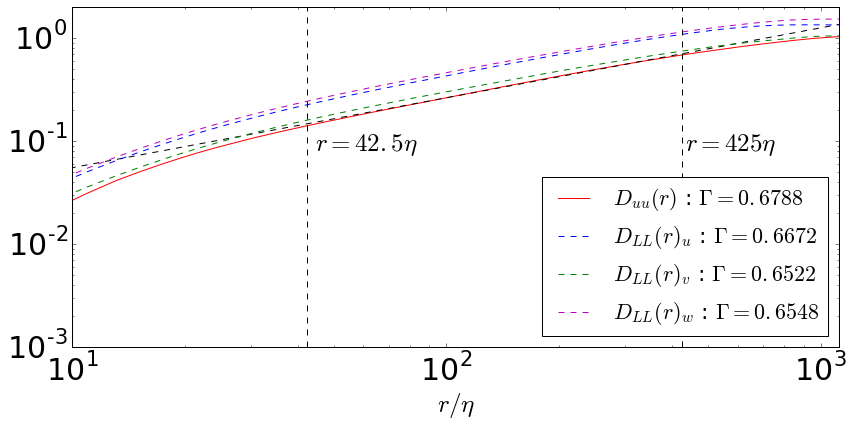

In [56]:
plt.figure(figsize=(12,6))
plt.xlabel(r'$r/\eta$', fontsize=25)
plt.xlim([10*eta/eta,np.pi/eta])
plt.ylim([10**(-3),2*10**0])   

corrF1 = corrLoc[idx]/r2Loc[idx]
tempCorrF = corrF1[(lrp/eta>42.5)&(lrp/eta<425)]
tempCorrF = tempCorrF[:-1]
tempRp = lrp[(lrp/eta>42.5)&(lrp/eta<425)]
tempRp = tempRp[:-1]

fit = np.polyfit(np.log(tempRp),np.log(tempCorrF),1)
print("Linear fit [Gamma A] = "+str(fit))

plt.loglog(lrp/eta,(corrF1)/avgu2,'r',label=r'$D_{{uu}}(r)$ : $\Gamma = {one:.4f}$'.format(one=fit[0]))
plt.loglog(lrp/eta,np.exp(fit[1])*(lrp**(fit[0]))/avgu2,'k--')

########################

fit = np.polyfit(np.log(r[(r>42.5*eta)&(r<425*eta)]/eta),np.log(df2lt_u[(r>42.5*eta)&(r<425*eta)]/avgu2),1)
print("Linear fit reference [Gamma A] = "+str(fit))

plt.loglog(r[1:]/eta,df2lt_u[1:]/avgu2,'b--',label=r'$D_{{LL}}(r)_u$ : $\Gamma = {one:.4f}$'.format(one=fit[0]))

########################

fit = np.polyfit(np.log(r[(r>42.5*eta)&(r<425*eta)]/eta),np.log(df2lt_v[(r>42.5*eta)&(r<425*eta)]/avgu2),1)
print("Linear fit reference [Gamma A] = "+str(fit))

plt.loglog(r[1:]/eta,df2lt_v[1:]/avgv2,'g--',label=r'$D_{{LL}}(r)_v$ : $\Gamma = {one:.4f}$'.format(one=fit[0]))

########################

fit = np.polyfit(np.log(r[(r>42.5*eta)&(r<425*eta)]/eta),np.log(df2lt_w[(r>42.5*eta)&(r<425*eta)]/avgu2),1)
print("Linear fit reference [Gamma A] = "+str(fit))

plt.loglog(r[1:]/eta,df2lt_w[1:]/avgw2,'m--',label=r'$D_{{LL}}(r)_w$ : $\Gamma = {one:.4f}$'.format(one=fit[0]))

########################

plt.text(44.5, 0.08, r'$r = 42.5\eta$', fontsize=25)
plt.text(435., 0.08, r'$r = 425\eta$', fontsize=25)
plt.axvline(x=42.50, color='k', linestyle='--')
plt.axvline(x=425.0, color='k', linestyle='--')

plt.legend(loc='lower right',prop={'size':22})
plt.tight_layout()
plt.savefig('2nd-order-SF-uu_x_LLu_3.pdf')

Linear fit [Gamma A] = [ 0.67875802 -1.35998644]
Linear fit reference [Gamma A] = [ 0.65813541 -3.99370784]


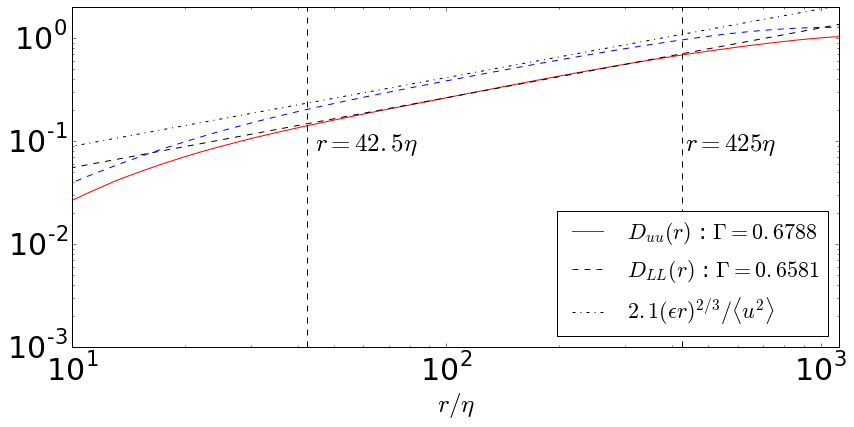

In [19]:
plt.figure(figsize=(12,6))
plt.xlabel(r'$r/\eta$', fontsize=25)
plt.xlim([10*eta/eta,np.pi/eta])
plt.ylim([10**(-3),2*10**0])   

corrF1 = corrLoc[idx]/r2Loc[idx]
tempCorrF = corrF1[(lrp/eta>42.5)&(lrp/eta<425)]
tempCorrF = tempCorrF[:-1]
tempRp = lrp[(lrp/eta>42.5)&(lrp/eta<425)]
tempRp = tempRp[:-1]

fit = np.polyfit(np.log(tempRp),np.log(tempCorrF),1)
print("Linear fit [Gamma A] = "+str(fit))

plt.loglog(lrp/eta,(corrF1)/avgu2,'r',label=r'$D_{{uu}}(r)$ : $\Gamma = {one:.4f}$'.format(one=fit[0]))
plt.loglog(lrp/eta,np.exp(fit[1])*(lrp**(fit[0]))/avgu2,'k--')

########################

df2_add = (df2lt_u+df2lt_v+df2lt_w)/(avgu2+avgv2+avgw2)

fit = np.polyfit(np.log(r[(r>42.5*eta)&(r<425*eta)]/eta),np.log(df2_add[(r>42.5*eta)&(r<425*eta)]),1)
print("Linear fit reference [Gamma A] = "+str(fit))

plt.loglog(r[1:]/eta,df2_add[1:],'b--',label=r'$D_{{LL}}(r)$ : $\Gamma = {one:.4f}$'.format(one=fit[0]))

########################

# 2.1 epsilon^(2/3) r^(2/3)

epsilon = 0.103
plt.loglog(r[1:]/eta,(3*2.0/(avgu2+avgv2+avgw2))*(epsilon*r[1:])**(2./3.),'k-.',label=r'$2.1 (\epsilon r)^{{2/3}}/\langle u^2\rangle$')

########################

plt.text(44.5, 0.08, r'$r = 42.5\eta$', fontsize=25)
plt.text(435., 0.08, r'$r = 425\eta$', fontsize=25)
plt.axvline(x=42.50, color='k', linestyle='--')
plt.axvline(x=425.0, color='k', linestyle='--')

plt.legend(loc='lower right',prop={'size':22})
plt.tight_layout()
plt.savefig('2nd-order-SF-uu_x_LLu_0.pdf')

Linear fit reference [Gamma A] = [ 0.65813541 -3.99370784]


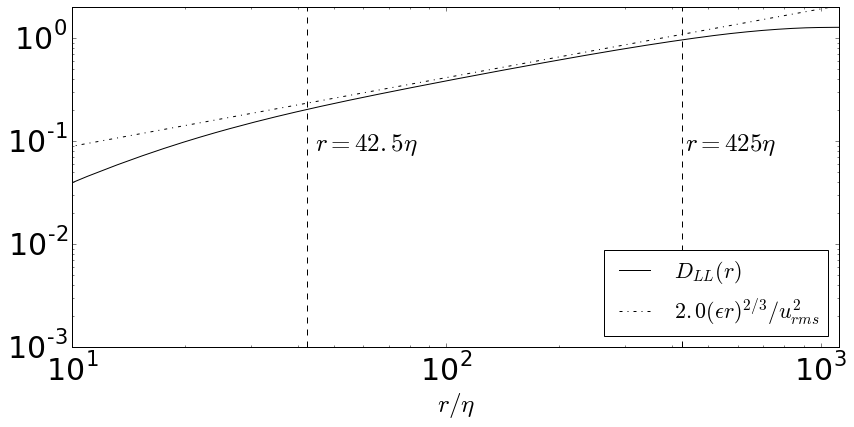

In [25]:
plt.figure(figsize=(12,6))
plt.xlabel(r'$r/\eta$', fontsize=25)
plt.xlim([10*eta/eta,np.pi/eta])
plt.ylim([10**(-3),2*10**0])   

########################

df2_add = (df2lt_u+df2lt_v+df2lt_w)/(avgu2+avgv2+avgw2)

fit = np.polyfit(np.log(r[(r>42.5*eta)&(r<425*eta)]/eta),np.log(df2_add[(r>42.5*eta)&(r<425*eta)]),1)
print("Linear fit reference [Gamma A] = "+str(fit))

plt.loglog(r[1:]/eta,df2_add[1:],'k-',label=r'$D_{{LL}}(r)$')

########################

epsilon = 0.103
plt.loglog(r[1:]/eta,(3*2.0/(avgu2+avgv2+avgw2))*(epsilon*r[1:])**(2./3.),'k-.',label=r'$2.0 (\epsilon r)^{{2/3}}/u_{rms}^2$')

########################

plt.text(44.5, 0.08, r'$r = 42.5\eta$', fontsize=25)
plt.text(435., 0.08, r'$r = 425\eta$', fontsize=25)
plt.axvline(x=42.50, color='k', linestyle='--')
plt.axvline(x=425.0, color='k', linestyle='--')

plt.legend(loc='lower right',prop={'size':22})
plt.tight_layout()
plt.savefig('2nd-order-SF-uu_x_LLu_0.pdf')

Linear fit [Gamma A] = [ 0.67875802 -1.35998644]
Linear fit reference [Gamma A] = [ 0.65863179 -3.96255732]


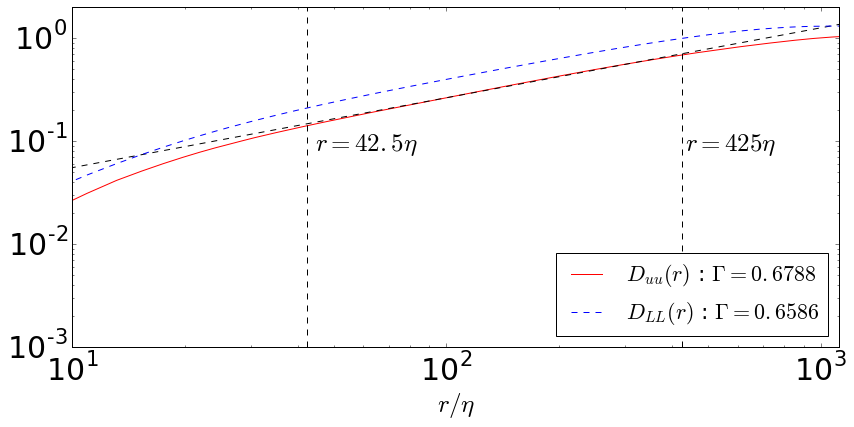

In [58]:
plt.figure(figsize=(12,6))
plt.xlabel(r'$r/\eta$', fontsize=25)
plt.xlim([10*eta/eta,np.pi/eta])
plt.ylim([10**(-3),2*10**0])   

corrF1 = corrLoc[idx]/r2Loc[idx]
tempCorrF = corrF1[(lrp/eta>42.5)&(lrp/eta<425)]
tempCorrF = tempCorrF[:-1]
tempRp = lrp[(lrp/eta>42.5)&(lrp/eta<425)]
tempRp = tempRp[:-1]

fit = np.polyfit(np.log(tempRp),np.log(tempCorrF),1)
print("Linear fit [Gamma A] = "+str(fit))

plt.loglog(lrp/eta,(corrF1)/avgu2,'r',label=r'$D_{{uu}}(r)$ : $\Gamma = {one:.4f}$'.format(one=fit[0]))
plt.loglog(lrp/eta,np.exp(fit[1])*(lrp**(fit[0]))/avgu2,'k--')

########################

df2_add = (df2lt_u/avgu2 + df2lt_v/avgv2 + df2lt_w/avgw2)/3

fit = np.polyfit(np.log(r[(r>42.5*eta)&(r<425*eta)]/eta),np.log(df2_add[(r>42.5*eta)&(r<425*eta)]),1)
print("Linear fit reference [Gamma A] = "+str(fit))

plt.loglog(r[1:]/eta,df2_add[1:],'b--',label=r'$D_{{LL}}(r)$ : $\Gamma = {one:.4f}$'.format(one=fit[0]))

########################

plt.text(44.5, 0.08, r'$r = 42.5\eta$', fontsize=25)
plt.text(435., 0.08, r'$r = 425\eta$', fontsize=25)
plt.axvline(x=42.50, color='k', linestyle='--')
plt.axvline(x=425.0, color='k', linestyle='--')

plt.legend(loc='lower right',prop={'size':22})
plt.tight_layout()
plt.savefig('2nd-order-SF-uu_x_LLu_1.pdf')

Linear fit [Gamma A] = [ 0.67875802 -1.35998644]
Linear fit reference [Gamma A] = [ 0.66721581 -3.92254766]


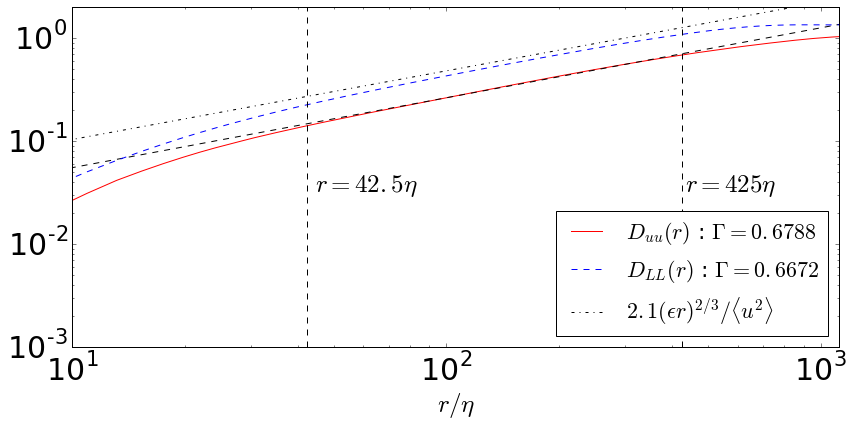

In [68]:
plt.figure(figsize=(12,6))
plt.xlabel(r'$r/\eta$', fontsize=25)
plt.xlim([10*eta/eta,np.pi/eta])
plt.ylim([10**(-3),2*10**0])   

corrF1 = corrLoc[idx]/r2Loc[idx]
tempCorrF = corrF1[(lrp/eta>42.5)&(lrp/eta<425)]
tempCorrF = tempCorrF[:-1]
tempRp = lrp[(lrp/eta>42.5)&(lrp/eta<425)]
tempRp = tempRp[:-1]

fit = np.polyfit(np.log(tempRp),np.log(tempCorrF),1)
print("Linear fit [Gamma A] = "+str(fit))

plt.loglog(lrp/eta,(corrF1)/avgu2,'r',label=r'$D_{{uu}}(r)$ : $\Gamma = {one:.4f}$'.format(one=fit[0]))
plt.loglog(lrp/eta,np.exp(fit[1])*(lrp**(fit[0]))/avgu2,'k--')

########################

fit = np.polyfit(np.log(r[(r>42.5*eta)&(r<425*eta)]/eta),np.log(df2lt_u[(r>42.5*eta)&(r<425*eta)]/avgu2),1)
print("Linear fit reference [Gamma A] = "+str(fit))

plt.loglog(r[1:]/eta,df2lt_u[1:]/avgu2,'b--',label=r'$D_{{LL}}(r)$ : $\Gamma = {one:.4f}$'.format(one=fit[0]))

########################

# 2.1 epsilon^(2/3) r^(2/3)

epsilon = 0.103
plt.loglog(r[1:]/eta,(2.1/avgu2)*(epsilon*r[1:])**(2./3.),'k-.',label=r'$2.1 (\epsilon r)^{{2/3}}/\langle u^2\rangle$')

########################

plt.text(44.5, 0.032, r'$r = 42.5\eta$', fontsize=25)
plt.text(435., 0.032, r'$r = 425\eta$', fontsize=25)
plt.axvline(x=42.50, color='k', linestyle='--')
plt.axvline(x=425.0, color='k', linestyle='--')

plt.legend(loc='lower right',prop={'size':22})
plt.tight_layout()
plt.savefig('2nd-order-SF-uu_x_LLu_2.pdf')

In [69]:
filename = 'direct_transverse_sf_u.npz'

content = np.load(filename)

df2tv = content['df2tv']
df2tv_u = df2tv[:,0]
df2tv_v = df2tv[:,1]
df2tv_w = df2tv[:,2]
avg = content['avg']
r = content['r']

Linear fit [Gamma A] = [ 0.67875802 -1.35998644]
Linear fit reference [Gamma A] = [ 0.76553556 -3.28765428]
Linear fit reference [Gamma A] = [ 0.61674603 -2.72455449]
Linear fit reference [Gamma A] = [ 0.73735848 -3.2043659 ]


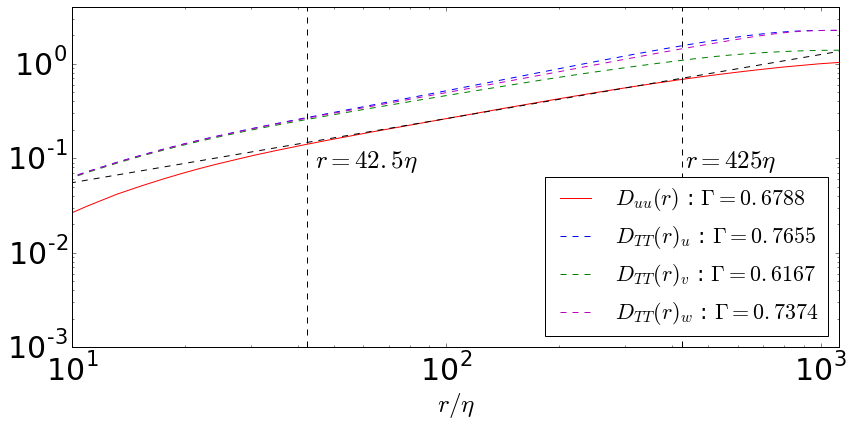

In [76]:
plt.figure(figsize=(12,6))
plt.xlabel(r'$r/\eta$', fontsize=25)
plt.xlim([10*eta/eta,np.pi/eta])
plt.ylim([10**(-3),4*10**0])   

corrF1 = corrLoc[idx]/r2Loc[idx]
tempCorrF = corrF1[(lrp/eta>42.5)&(lrp/eta<425)]
tempCorrF = tempCorrF[:-1]
tempRp = lrp[(lrp/eta>42.5)&(lrp/eta<425)]
tempRp = tempRp[:-1]

fit = np.polyfit(np.log(tempRp),np.log(tempCorrF),1)
print("Linear fit [Gamma A] = "+str(fit))

plt.loglog(lrp/eta,(corrF1)/avgu2,'r',label=r'$D_{{uu}}(r)$ : $\Gamma = {one:.4f}$'.format(one=fit[0]))
plt.loglog(lrp/eta,np.exp(fit[1])*(lrp**(fit[0]))/avgu2,'k--')

########################

fit = np.polyfit(np.log(r[(r>42.5*eta)&(r<425*eta)]/eta),np.log(df2tv_u[(r>42.5*eta)&(r<425*eta)]/avgu2),1)
print("Linear fit reference [Gamma A] = "+str(fit))

plt.loglog(r[1:]/eta,df2tv_u[1:],'b--',label=r'$D_{{TT}}(r)_u$ : $\Gamma = {one:.4f}$'.format(one=fit[0]))

########################

fit = np.polyfit(np.log(r[(r>42.5*eta)&(r<425*eta)]/eta),np.log(df2tv_v[(r>42.5*eta)&(r<425*eta)]/avgu2),1)
print("Linear fit reference [Gamma A] = "+str(fit))

plt.loglog(r[1:]/eta,df2tv_v[1:],'g--',label=r'$D_{{TT}}(r)_v$ : $\Gamma = {one:.4f}$'.format(one=fit[0]))

########################

fit = np.polyfit(np.log(r[(r>42.5*eta)&(r<425*eta)]/eta),np.log(df2tv_w[(r>42.5*eta)&(r<425*eta)]/avgu2),1)
print("Linear fit reference [Gamma A] = "+str(fit))

plt.loglog(r[1:]/eta,df2tv_w[1:],'m--',label=r'$D_{{TT}}(r)_w$ : $\Gamma = {one:.4f}$'.format(one=fit[0]))

########################

plt.text(44.5, 0.08, r'$r = 42.5\eta$', fontsize=25)
plt.text(435., 0.08, r'$r = 425\eta$', fontsize=25)
plt.axvline(x=42.50, color='k', linestyle='--')
plt.axvline(x=425.0, color='k', linestyle='--')

plt.legend(loc='lower right',prop={'size':22})
plt.tight_layout()
plt.savefig('2nd-order-SF-uu_x_TT_3.pdf')

In [82]:
%matplotlib inline

matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30) 

idx = r2Loc>0

dx = 2*np.pi/N
rp=np.linspace(1*dx,ner*dx,ner)

lrp = rp[idx]

In [83]:
rnd = np.array([2.13795231761065,3.53939408627910,5.85949012744485,
       9.70042434289028,16.0591161322038,26.5859721009655,
       44.0132512110006,72.8642260965997,120.627204275458,
       199.699127964690,330.603216325818,547.315793308326])

In [84]:
m_ltSF = np.array([0.00123596940843595,0.00460545818291248,0.0128498574053329,
          0.0183853182049434,0.0403278666244338,0.0697328479953941,
          0.0910498801556025,0.140415981125808,0.193889492090562,
          0.295881351423257,0.366143436376498,0.499303933322758])

In [85]:
m_tvSF = np.array([0.00243443231593515,0.00880090268920048,0.0231944735848077,
          0.0321966701078908,0.0646441092493949,0.103534500495395,
          0.131561813781786,0.200324122239205,0.283503596674194,
          0.449615225687709,0.590078888546716,0.819162158800761])

In [105]:
print(avgu2)

0.410786


In [130]:
rnd80 = np.array([2.13795231761065,2.31362288516246,2.50372789451625,2.70945339017020,2.93208287113932,3.17300529856633,
                3.43372376129940,3.71586485350005,4.02118882278750,4.35160055223221,4.70916144471448,5.09610228379297,
                5.51483715132102,5.96797848864096,6.45835339532186,6.98902126712655,7.56329288324936,8.18475106190783,
                8.85727301315625,9.58505452837798,10.3726361573719,11.2249315363495,12.1472580435770,13.1453699739208,
                14.2254944392681,15.3943702188010,16.6592898015079,18.0281448832300,19.5094756020941,21.1125238195063,
                22.8472907791215,24.7245995035158,26.7561623178483,28.9546539217853,31.3337904655744,33.9084151236157,
                36.6945906994139,39.7096998396642,42.9725534826968,46.5035082178765,50.3245932881527,54.4596480281124,
                58.9344705949983,63.7769789206092,69.0173848882429,74.6883828213536,80.8253534598836,87.4665846968560,
                94.6535104523785,102.430969175370,110.847483585770,119.955563402519,129.812032945988,140.478385658738,
                152.021167756428,164.512393402427,178.029993996349,192.658304379592,208.488588991251,225.619611257033,
                244.158249763544,264.220165062176,285.930521262719,309.424766918648,334.849480075924,362.363282757504,
                392.137830588902,424.358883738990,459.227465857507,496.961118239767,537.795257043165,581.984642023008,
                629.804965950941,681.554574632204,737.556328252686,798.159615668552,863.742534205355,934.714248566164,
                1011.51754356569,1094.63158661665])

In [131]:
m_ltSF80 = np.array([0.00117989953500852,0.00117989953500852,0.00117989953500852,0.00117989953500852,
                   0.00117989953500852,0.00117989953500852,0.00440170193403303,0.00440170193403303,
                   0.00440170193403303,0.00440170193403303,0.00971649569458616,0.00971649569458616,
                   0.0120296980370895,0.0120296980370895,0.0120296980370895,0.0120296980370895,0.0146388896086612,
                   0.0146388896086612,0.0146388896086612,0.0146388896086612,0.0173250609078419,0.0173250609078419,
                   0.0199525981492668,0.0327414332565283,0.0355103658751099,0.0355103658751099,0.0381079633784525,
                   0.0528890885132615,0.0545832136305964,0.0561359150542348,0.0654191729971891,0.0668079117661061,
                   0.0680636086906593,0.0691906673262519,0.0770622684330197,0.0780474941915267,0.0789154339009613,
                   0.0864512046639279,0.0870763105257192,0.0879995859714083,0.0942292920209354,0.121774713595938,
                   0.128922254336061,0.129441516037630,0.135252535590646,0.140377259281221,0.140377259281221,
                   0.144991733623967,0.176054108068261,0.180416778828948,0.184436634864059,0.188095555286800,
                   0.217006546006224,0.220662761858753,0.223985093162924,0.255074411072880,0.257966410815806,
                   0.262620113598613,0.292484272477669,0.295803108542273,0.325870937741460,0.327508991617793,
                   0.358253076600395,0.387227234895548,0.413159111682847,0.413159111682847,0.435479619508599,
                   0.456546917180265,0.476654976614727,0.493826644283359,0.507007354104123,0.528491006703927,
                   0.536785404565640,0.543952381869088,0.553530942967970,0.557372854925570,0.553083383986622,
                   0.545057849350202,0.540389351592199,0.546381231613166])

In [132]:
m_tvSF80 = np.array([0.00233387171429194,0.00233387171429194,0.00233387171429194,0.00233387171429194,
                   0.00233387171429194,0.00233387171429194,0.00845204282753666,0.00845204282753666,
                   0.00845204282753666,0.00845204282753666,0.0176755184406039,0.0176755184406039,0.0218125446277559,
                   0.0218125446277559,0.0218125446277559,0.0218125446277559,0.0262174864401220,0.0262174864401220,
                   0.0262174864401220,0.0262174864401220,0.0305185713065092,0.0305185713065092,0.0345361839241291,
                   0.0536563760135845,0.0577303400162425,0.0577303400162425,0.0614355287222184,0.0812151863201405,
                   0.0835594668251195,0.0856646613233963,0.0980417577254845,0.0998742349383753,0.101516883544261,
                   0.102979273168732,0.113118387640754,0.114376420001136,0.115478439653956,0.125162550283382,
                   0.125954685314715,0.127130803112305,0.135255430425373,0.172101648386281,0.181705804223446,
                   0.182455908015345,0.190462354753112,0.197768625236671,0.197768625236671,0.204579686230132,
                   0.248330363386707,0.254976572059026,0.261149450041181,0.266810279839592,0.309085672292930,
                   0.314652435502948,0.319630451641109,0.366099736206712,0.370571274122031,0.378136286613738,
                   0.424918303007103,0.429931697891204,0.477142456069637,0.479033595634328,0.527643442667300,
                   0.575452344989772,0.618902581964039,0.618902581964039,0.657503990391878,0.694212417101902,
                   0.729864013814152,0.764864947240185,0.801626309847960,0.872261675069244,0.903834010955206,
                   0.934790237401329,0.980690993318267,1.01614248727106,1.04617540617642,1.06262908370303,
                   1.03383815113107,0.975774843491620])

Linear fit [Gamma A] = [ 0.67875802 -1.35998644]
Linear fit [Gamma A] = [ 0.71010801 -5.04141761]
Linear fit [Gamma A] = [ 0.73638729 -4.8045309 ]


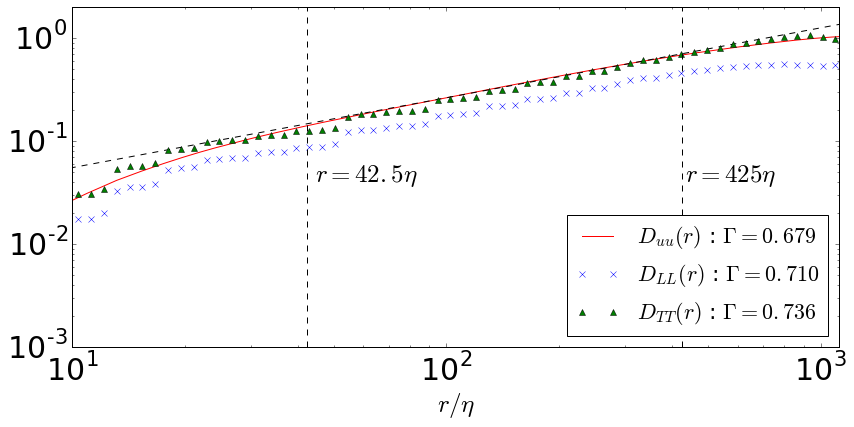

In [134]:
plt.figure(figsize=(12,6))
plt.xlabel(r'$r/\eta$', fontsize=25)
plt.xlim([10*eta/eta,np.pi/eta])
plt.ylim([10**(-3),2*10**0])   

corrF1 = corrLoc[idx]/r2Loc[idx]
tempCorrF = corrF1[(lrp/eta>42.5)&(lrp/eta<425)]
tempCorrF = tempCorrF[:-1]
tempRp = lrp[(lrp/eta>42.5)&(lrp/eta<425)]
tempRp = tempRp[:-1]

fit = np.polyfit(np.log(tempRp),np.log(tempCorrF),1)
print("Linear fit [Gamma A] = "+str(fit))

plt.loglog(lrp/eta,(corrF1)/avgu2,'r',label=r'$D_{{uu}}(r)$ : $\Gamma = {one:.3f}$'.format(one=fit[0]))
plt.loglog(lrp/eta,np.exp(fit[1])*(lrp**(fit[0]))/avgu2,'k--')

tempRp = rnd80[(rnd80>42.5)&(rnd80<425)]
tempCorrF = m_ltSF80[(rnd80>42.5)&(rnd80<425)]
fit = np.polyfit(np.log(tempRp),np.log(tempCorrF),1)
print("Linear fit [Gamma A] = "+str(fit))
plt.loglog(rnd80,m_ltSF80,'bx',label=r'$D_{{LL}}(r)$ : $\Gamma = {one:.3f}$'.format(one=fit[0]))
#plt.loglog(rnd,np.exp(fit[1])*(rnd**(fit[0])),'k--')

tempRp = rnd80[(rnd80>42.5)&(rnd80<425)]
tempCorrF = m_tvSF80[(rnd80>42.5)&(rnd80<425)]
fit = np.polyfit(np.log(tempRp),np.log(tempCorrF),1)
print("Linear fit [Gamma A] = "+str(fit))
plt.loglog(rnd80,m_tvSF80,'g^',label=r'$D_{{TT}}(r)$ : $\Gamma = {one:.3f}$'.format(one=fit[0]))

plt.text(44.5, 0.04, r'$r = 42.5\eta$', fontsize=25)
plt.text(435., 0.04, r'$r = 425\eta$', fontsize=25)
plt.axvline(x=42.50, color='k', linestyle='--')
plt.axvline(x=425.0, color='k', linestyle='--')

plt.legend(loc='lower right',prop={'size':22})
plt.tight_layout()
plt.savefig('2nd-order-absolute-structure-function-80.pdf')

In [135]:
rnd40 = np.array([2.13795231761065,2.50880251009135,2.94398054755256,3.45464476757570,4.05388903811195,
                  4.75707849547056,5.58224351957300,6.55054204833598,7.68680208531998,9.02015831100411,
                  10.5847991209454,12.4208432455212,14.5753684285347,17.1036185408852,20.0704200807308,
                  23.5518443804204,27.6371581406055,32.4311123048956,38.0566279637645,44.6579481565840,
                  52.4043363866878,61.4944166825598,72.1612664880328,84.6783929675634,99.3667459641695,
                  116.602947428277,136.828948327081,160.563360645846,188.414755043364,221.097265124844,
                  259.448898439165,304.453023710116,357.263585252672,419.234691093502,491.955333460479,
                  577.290131904263,677.427143740508,794.933967713356,932.823579426218,1094.63158661665])

In [142]:
m_ltSF40 = np.array([0.00117765969712031,0.00117765969712031,0.00117765969712031,0.00438836513320383,
                   0.00438836513320383,0.00973882060782536,0.0120423358969501,0.0120423358969501,0.0146402796594115,
                   0.0146402796594115,0.0173166133161311,0.0199370614937824,0.0354755262350542,0.0380698782772066,
                   0.0545279811589546,0.0653479303677987,0.0679805919267262,0.0770042677557101,0.0796133317868611,
                   0.0876108482437426,0.0945561782857128,0.129266094376895,0.135473027207867,0.145635577694645,
                   0.175946751348300,0.184625468822477,0.219282512936191,0.248001272802357,0.258358151161358,
                   0.287647499267316,0.315670337498595,0.366392364554797,0.389938464772617,0.434569909510151,
                   0.476135789656769,0.511612756002647,0.552353050906443,0.596849289610737,0.614031985216766,
                   0.604888083294432])

In [143]:
m_tvSF40 = np.array([0.00233299983160507,0.00233299983160507,0.00233299983160507,0.00844002689984456,0.00844002689984456,
                   0.0176530904043434,0.0217762287985180,0.0217762287985180,0.0261606913405083,0.0261606913405083,
                   0.0304354839812937,0.0344223722463453,0.0574342353591308,0.0610944738879334,0.0826381240656413,
                   0.0969175872648012,0.100322824818448,0.111737391458210,0.115037173834707,0.125115322790508,
                   0.133905631434887,0.179283141008053,0.187290304977309,0.200992639849034,0.244082976535897,
                   0.256567250224779,0.308373004491625,0.352146899263923,0.367734533196299,0.412811794854471,
                   0.457813004474986,0.539457969232623,0.576733278186026,0.644179942311184,0.709946789603659,
                   0.767885705219372,0.838327808892683,0.898189877243315,0.914797889612350,0.920622217961270])

In [ ]:
plt.figure(figsize=(12,6))
plt.xlabel(r'$r/\eta$', fontsize=25)
plt.xlim([10*eta/eta,np.pi/eta])
plt.ylim([10**(-3),2*10**0])   

corrF1 = corrLoc[idx]/r2Loc[idx]
tempCorrF = corrF1[(lrp/eta>42.5)&(lrp/eta<425)]
tempCorrF = tempCorrF[:-1]
tempRp = lrp[(lrp/eta>42.5)&(lrp/eta<425)]
tempRp = tempRp[:-1]

fit = np.polyfit(np.log(tempRp),np.log(tempCorrF),1)
print("Linear fit [Gamma A] = "+str(fit))

plt.loglog(lrp/eta,(corrF1)/avgu2,'r',label=r'$D_{{uu}}(r)$ : $\Gamma = {one:.3f}$'.format(one=fit[0]))
plt.loglog(lrp/eta,np.exp(fit[1])*(lrp**(fit[0]))/avgu2,'k--')

tempRp = rnd40[(rnd40>42.5)&(rnd40<425)]
tempCorrF = m_ltSF40[(rnd40>42.5)&(rnd40<425)]
fit = np.polyfit(np.log(tempRp),np.log(tempCorrF),1)
print("Linear fit [Gamma A] = "+str(fit))
plt.loglog(rnd40,m_ltSF40,'bx',label=r'$D_{{LL}}(r)$ : $\Gamma = {one:.3f}$'.format(one=fit[0]))
#plt.loglog(rnd,np.exp(fit[1])*(rnd**(fit[0])),'k--')

tempRp = rnd40[(rnd40>42.5)&(rnd40<425)]
tempCorrF = m_tvSF40[(rnd40>42.5)&(rnd40<425)]
fit = np.polyfit(np.log(tempRp),np.log(tempCorrF),1)
print("Linear fit [Gamma A] = "+str(fit))
plt.loglog(rnd40,m_tvSF40,'g^',label=r'$D_{{TT}}(r)$ : $\Gamma = {one:.3f}$'.format(one=fit[0]))

plt.text(44.5, 0.04, r'$r = 42.5\eta$', fontsize=25)
plt.text(435., 0.04, r'$r = 425\eta$', fontsize=25)
plt.axvline(x=42.50, color='k', linestyle='--')
plt.axvline(x=425.0, color='k', linestyle='--')

plt.legend(loc='lower right',prop={'size':22})
plt.tight_layout()
plt.savefig('2nd-order-absolute-structure-function-40.pdf')

Linear fit [Gamma A] = [ 0.67875802 -1.35998644]
Linear fit [Gamma A] = [ 0.70128462 -5.02512014]
Linear fit [Gamma A] = [ 0.72812839 -4.8049394 ]
